In [1]:
#資料清理與視覺化module
from get_actual_date import get_actual_date
from get_review import get_review
import pandas as pd
import os
from datetime import datetime

df = pd.DataFrame(columns = ['username', 'time', 'comment', 'star']) 

#取前4000則評論,get_review一次10筆資料
total = 4000
interval = 10

end = int(total/interval)
for i in range(0, end):
    #篩選最新,由最新到最舊排序
    url = "https://www.google.com.tw/maps/preview/review/listentitiesreviews?authuser=0&hl=zh-TW&gl=tw&pb=!1m2!1y3778120077998007195!2y5946452932430435197!2m2!1i"+str(i*interval)+"!2i10!3e2!4m5!3b1!4b1!5b1!6b1!7b1!5m2!1s8VwdX66aJaXdmAW-7bCYDg!7e81"
    df = df.append(get_review(url))
df = df.reset_index()
df

,index,username,time,comment,star
0,0,林冠佑,None,None,5
1,1,Cian Wun Chen,None,去了三次都公休...\n是一間很容易公休的飲料店..,4
2,2,Kiam Hsu,20200807,葡萄柚綠新鮮好喝，不過應該是生意太好我們點了三杯也收了錢結果只給我們一杯，反應後補的兩杯也沒...,2
3,3,Ling C.,20200807,平常不特別愛喝含糖飲料\n但他們家的招牌葡萄柚果粒茶 \n真的是酷暑下的聖品啊！,4
4,4,陳有德,20200807,None,4
...,...,...,...,...,...
3995,5,陳園霖,20160808,None,5
3996,6,Tzu Lung Chang,20160808,None,3
3997,7,Richard Wang,20160808,喝過一次還不錯喝~~但是就是貴了點Orz,4
3998,8,Miffy Li,20160808,飲料調製恰到好處，各種飲料在屏幕上都有介紹其產地及口感，強調農產品皆符合標準，飲用更安心。,4


In [2]:
#存檔,下次使用不用再重新爬蟲
df.to_csv('review_'+datetime.today().strftime('%Y%m%d')+'.txt', sep='\t', index=False, encoding='utf-8')

In [3]:
#檢視每個欄位資料是否有NULL,並檢視該欄位有NULL是否合理
for col in list(df):
    print(col,'has null values:',df[col].isnull().values.any())

index has null values: False
username has null values: False
time has null values: True
comment has null values: False
star has null values: False


In [4]:
#將time是None的資料轉換成當天的日期
from datetime import datetime
df['time'] = df['time'].replace(to_replace=[None],value=datetime.today().strftime('%Y%m%d'))
df['time']

0       20200808
1       20200808
2       20200807
3       20200807
4       20200807
          ...   
3995    20160808
3996    20160808
3997    20160808
3998    20160808
3999    20160808
Name: time, Length: 4000, dtype: object

In [5]:
#用yyyymmdd來分析維度太細,將yyyymmdd轉換成yyyy與yyyymm
df['yyyy'] = df['time'].str[:4]
df['yyyymm'] = df['time'].str[:6]
df = df.reset_index()
df = df[['username', 'time', 'yyyy', 'yyyymm', 'comment', 'star']]
df

,username,time,yyyy,yyyymm,comment,star
0,林冠佑,20200808,2020,202008,None,5
1,Cian Wun Chen,20200808,2020,202008,去了三次都公休...\n是一間很容易公休的飲料店..,4
2,Kiam Hsu,20200807,2020,202008,葡萄柚綠新鮮好喝，不過應該是生意太好我們點了三杯也收了錢結果只給我們一杯，反應後補的兩杯也沒...,2
3,Ling C.,20200807,2020,202008,平常不特別愛喝含糖飲料\n但他們家的招牌葡萄柚果粒茶 \n真的是酷暑下的聖品啊！,4
4,陳有德,20200807,2020,202008,None,4
...,...,...,...,...,...,...
3995,陳園霖,20160808,2016,201608,None,5
3996,Tzu Lung Chang,20160808,2016,201608,None,3
3997,Richard Wang,20160808,2016,201608,喝過一次還不錯喝~~但是就是貴了點Orz,4
3998,Miffy Li,20160808,2016,201608,飲料調製恰到好處，各種飲料在屏幕上都有介紹其產地及口感，強調農產品皆符合標準，飲用更安心。,4


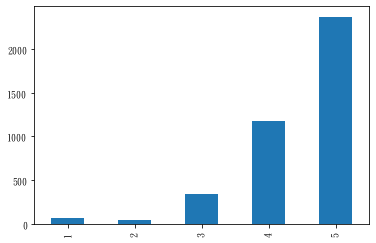

In [8]:
#檢視4000筆中各star數量
pd.value_counts(df['star'].values).sort_index().plot.bar()

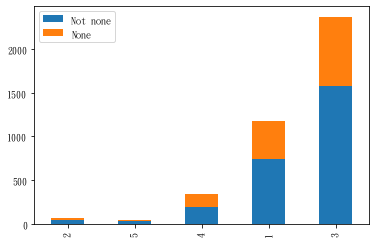

In [7]:
#各star的comment為None的比例,檢視有評論的比例
total_list = []
none_list = []
not_none_list = []

for i in range(1, 6):
    df_star = df[pd.to_numeric(df['star']) == i]
    total_list.append(df_star['star'].count())
    df_star['star'][df_star['comment']=='None'].count()
    none_list.append(df_star['star'][df_star['comment']=='None'].count())

not_none_list = [m - n for m,n in zip(total_list,none_list)]

df_comment = pd.DataFrame({'Not none': not_none_list,
                   'None': none_list}, index=list(set(df['star'])))
df_comment.plot.bar(stacked=True)

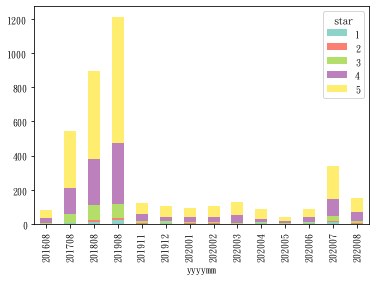

In [9]:
#觀察yyyymm的star數量，以yyyymm為x軸，star為y軸
import matplotlib.pyplot as plt
df.groupby(['yyyymm', 'star']).size().unstack().plot(kind='bar', stacked=True, colormap='Set3')

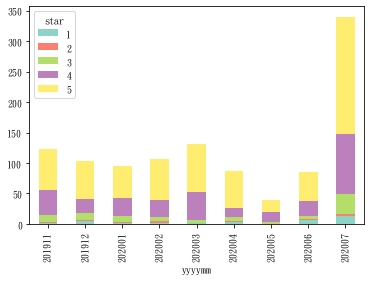

In [10]:
#因為時間在滿10個月但未2年前皆顯示為1年前,因此應該僅考慮九個月內的
#也不應該考慮當月,因為當月資料還不完整
df_recent = df[(df['yyyymm']>='201911') & (df['yyyymm']<='202007')]
df_recent.groupby(['yyyymm', 'star']).size().unstack().plot(kind='bar', stacked=True, colormap='Set3')